# World population age

In [1]:
%matplotlib inline

import urllib

import pandas as pd

URL = 'http://www.census.gov/population/international/data/idb/worldpop.php'
POST = {'popYears': 2014, 'submit': 'Submit'}

page = urllib.urlopen(URL, urllib.urlencode(POST)).read()

## Total

In [2]:
df = pd.read_html(page, skiprows=[1], attrs={'class': 'query_table'})[0]
df['Age'] = df['Age'].replace('100 +', '100').astype(int)
df = df.set_index('Age')

total = df['Both Sexes Population'].sum()
total

7178722893L

## Distribution

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
0,130407552,67385079,63022473,106.9
1,128511797,66408175,62103622,106.9
2,127294588,65818056,61476532,107.1
3,126285687,65327445,60958242,107.2
4,125573757,64970711,60603046,107.2
5,125078983,64727243,60351740,107.3
6,124516199,64449671,60066528,107.3
7,123460260,63907644,59552616,107.3
8,122330066,63324396,59005670,107.3


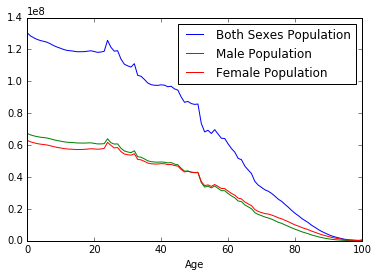

In [3]:
df[['Both Sexes Population', 'Male Population', 'Female Population']].plot()
df.head(30)

## Mode (top 10)

In [4]:
df.sort_values('Both Sexes Population', ascending=False).head(10)

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
0,130407552,67385079,63022473,106.9
1,128511797,66408175,62103622,106.9
2,127294588,65818056,61476532,107.1
3,126285687,65327445,60958242,107.2
24,125754715,64000504,61754211,103.6
4,125573757,64970711,60603046,107.2
5,125078983,64727243,60351740,107.3
6,124516199,64449671,60066528,107.3
7,123460260,63907644,59552616,107.3


## Mean

In [5]:
(df.index.values * df['Both Sexes Population']).sum() / float(total)

31.802015445896945

## Median

In [6]:
df[df['Both Sexes Population'].cumsum() >= total / 2][:1]

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
29,110809053,56385474,54423579,103.6
